Сначала создадим сигнал x(t)=f(t) на заданном временном отрезке. 

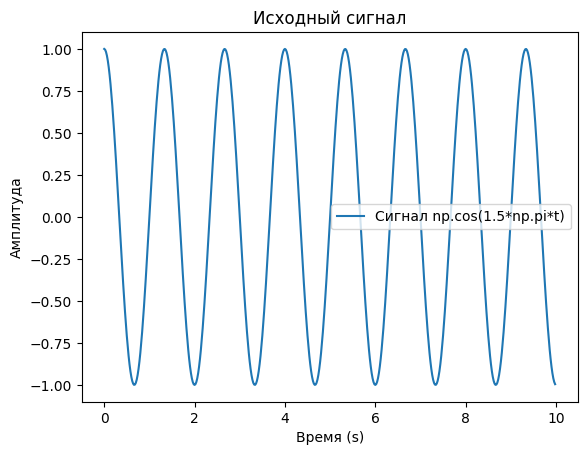

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигнала
T1 = 0
T2 = 10
t = np.arange(T1, T2, 0.02)
x = np.cos(1.5*np.pi*t)  # Пример функции

plt.plot(t, x, label='Сигнал np.cos(1.5*np.pi*t)')
plt.xlabel('Время (s)')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')
plt.legend()
plt.show()



Теперь мы создадим набор данных, используя 3-7 предыдущих значений для прогнозирования следующего

In [131]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for _ in range(time_step):
        data = np.insert(data, 0,0)
        
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    print(data)
    return np.array(X), np.array(y)

# Преобразование данных
time_step = 5  # Например, 5 предыдущих значений
X, y = create_dataset(x, time_step)

# Разделение на обучающую, валидационную и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00000000e+00  9.95561965e-01  9.82287251e-01
  9.60293686e-01  9.29776486e-01  8.91006524e-01  8.44327926e-01
  7.90155012e-01  7.28968627e-01  6.61311865e-01  5.87785252e-01
  5.09041416e-01  4.25779292e-01  3.38737920e-01  2.48689887e-01
  1.56434465e-01  6.27905195e-02 -3.14107591e-02 -1.25333234e-01
 -2.18143241e-01 -3.09016994e-01 -3.97147891e-01 -4.81753674e-01
 -5.62083378e-01 -6.37423990e-01 -7.07106781e-01 -7.70513243e-01
 -8.27080574e-01 -8.76306680e-01 -9.17754626e-01 -9.51056516e-01
 -9.75916762e-01 -9.92114701e-01 -9.99506560e-01 -9.98026728e-01
 -9.87688341e-01 -9.68583161e-01 -9.40880769e-01 -9.04827052e-01
 -8.60742027e-01 -8.09016994e-01 -7.50111070e-01 -6.84547106e-01
 -6.12907054e-01 -5.35826795e-01 -4.53990500e-01 -3.68124553e-01
 -2.78991106e-01 -1.87381315e-01 -9.41083133e-02 -1.83697020e-16
  9.41083133e-02  1.87381315e-01  2.78991106e-01  3.68124553e-01
  4.53990500e-01  5.35826

Используем Min-Max масштабирование:

In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Преобразуем y
y_train = scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val = scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()


Построение полносвязной нейронной сети

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Полносвязная сеть
model_dense = Sequential()
model_dense.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_dense.add(Dense(32, activation='relu'))
model_dense.add(Dense(1))

model_dense.compile(optimizer='adam', loss='mean_squared_error')
model_dense.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16)


Epoch 1/100


c:\Users\kasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0940 - val_loss: 0.0149
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0114 - val_loss: 0.0098
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_loss: 0.0056
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0035
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1263e-04 - val_loss: 0.0035
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8370e-04 - val_loss: 0.0035
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2804e-04 - val_loss: 0.0035
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0717e-04 - val_loss: 0.0035
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7261e-04 - val_loss: 0.0035
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9279e-04 - val_loss: 0.0035
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6594e-05 - val_loss: 0.0035
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

Построение GRU сети

In [134]:
from tensorflow.keras.layers import GRU

# GRU сеть
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dense(1))

model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, 
               validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val), 
               epochs=100, batch_size=16)


Epoch 1/100


c:\Users\kasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1366 - val_loss: 0.0169
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 - val_loss: 0.0131
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - val_loss: 0.0125
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - val_loss: 0.0112
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078 - val_loss: 0.0107
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_loss: 0.0102
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - val_loss: 0.0095
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 - val_loss: 0.0091
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - val_loss: 0.0083
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0085
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0066
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_l

Оценка моделей

In [135]:
from sklearn.metrics import mean_squared_error, r2_score

# Прогнозирование
y_pred_dense = model_dense.predict(X_test)
y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Оценка качества
rmse_dense = np.sqrt(mean_squared_error(y_test, y_pred_dense))
r2_dense = r2_score(y_test, y_pred_dense)

rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
r2_gru = r2_score(y_test, y_pred_gru)

print(f'Dense RMSE: {rmse_dense}, R2: {r2_dense}')
print(f'GRU RMSE: {rmse_gru}, R2: {r2_gru}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
Dense RMSE: 0.00026541195801325294, R2: 0.9999994163443646
GRU RMSE: 0.0069294040760715684, R2: 0.9996021608798648


Визуализация результатов

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00000000e+00  9.95561965e-01  9.82287251e-01
  9.60293686e-01  9.29776486e-01  8.91006524e-01  8.44327926e-01
  7.90155012e-01  7.28968627e-01  6.61311865e-01  5.87785252e-01
  5.09041416e-01  4.25779292e-01  3.38737920e-01  2.48689887e-01
  1.56434465e-01  6.27905195e-02 -3.14107591e-02 -1.25333234e-01
 -2.18143241e-01 -3.09016994e-01 -3.97147891e-01 -4.81753674e-01
 -5.62083378e-01 -6.37423990e-01 -7.07106781e-01 -7.70513243e-01
 -8.27080574e-01 -8.76306680e-01 -9.17754626e-01 -9.51056516e-01
 -9.75916762e-01 -9.92114701e-01 -9.99506560e-01 -9.98026728e-01
 -9.87688341e-01 -9.68583161e-01 -9.40880769e-01 -9.04827052e-01
 -8.60742027e-01 -8.09016994e-01 -7.50111070e-01 -6.84547106e-01
 -6.12907054e-01 -5.35826795e-01 -4.53990500e-01 -3.68124553e-01
 -2.78991106e-01 -1.87381315e-01 -9.41083133e-02 -1.83697020e-16
  9.41083133e-02  1.87381315e-01  2.78991106e-01  3.68124553e-01
  4.53990500e-01  5.35826

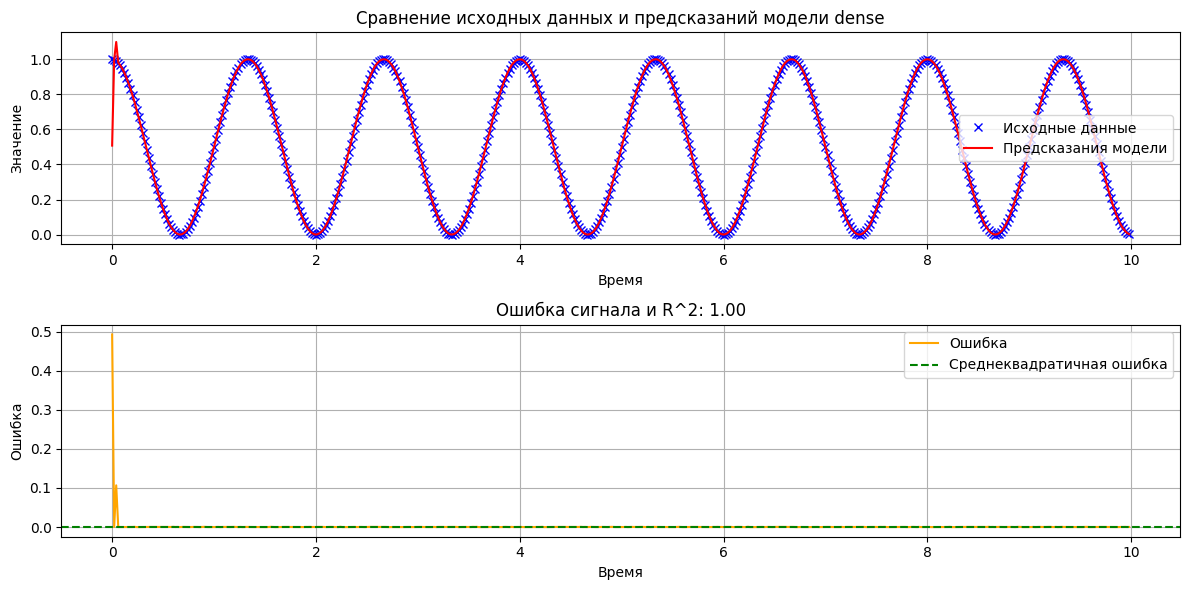

In [136]:
x = np.cos(1.5*np.pi*t)
x_inp, y = create_dataset(x, time_step)
x_inp = scaler.fit_transform(x_inp)
pred = model_dense.predict(x_inp)
x = scaler.fit_transform(x.reshape(-1, 1))


error = mean_squared_error(x, pred)
r2 = r2_score(x, pred)

# Построение графика
plt.figure(figsize=(12, 6))

# График исходных данных и предсказаний
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Исходные данные', color='blue', marker='x', linestyle='')
plt.plot(t, pred, label='Предсказания модели', color='red')
plt.title('Сравнение исходных данных и предсказаний модели dense')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid()

# График ошибки и R^2
plt.subplot(2, 1, 2)
plt.plot(t, np.abs(x - pred), label='Ошибка', color='orange')
plt.axhline(y=error, color='green', linestyle='--', label='Среднеквадратичная ошибка')
plt.title(f'Ошибка сигнала и R^2: {r2:.2f}')
plt.xlabel('Время')
plt.ylabel('Ошибка')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00000000e+00  9.95561965e-01  9.82287251e-01
  9.60293686e-01  9.29776486e-01  8.91006524e-01  8.44327926e-01
  7.90155012e-01  7.28968627e-01  6.61311865e-01  5.87785252e-01
  5.09041416e-01  4.25779292e-01  3.38737920e-01  2.48689887e-01
  1.56434465e-01  6.27905195e-02 -3.14107591e-02 -1.25333234e-01
 -2.18143241e-01 -3.09016994e-01 -3.97147891e-01 -4.81753674e-01
 -5.62083378e-01 -6.37423990e-01 -7.07106781e-01 -7.70513243e-01
 -8.27080574e-01 -8.76306680e-01 -9.17754626e-01 -9.51056516e-01
 -9.75916762e-01 -9.92114701e-01 -9.99506560e-01 -9.98026728e-01
 -9.87688341e-01 -9.68583161e-01 -9.40880769e-01 -9.04827052e-01
 -8.60742027e-01 -8.09016994e-01 -7.50111070e-01 -6.84547106e-01
 -6.12907054e-01 -5.35826795e-01 -4.53990500e-01 -3.68124553e-01
 -2.78991106e-01 -1.87381315e-01 -9.41083133e-02 -1.83697020e-16
  9.41083133e-02  1.87381315e-01  2.78991106e-01  3.68124553e-01
  4.53990500e-01  5.35826

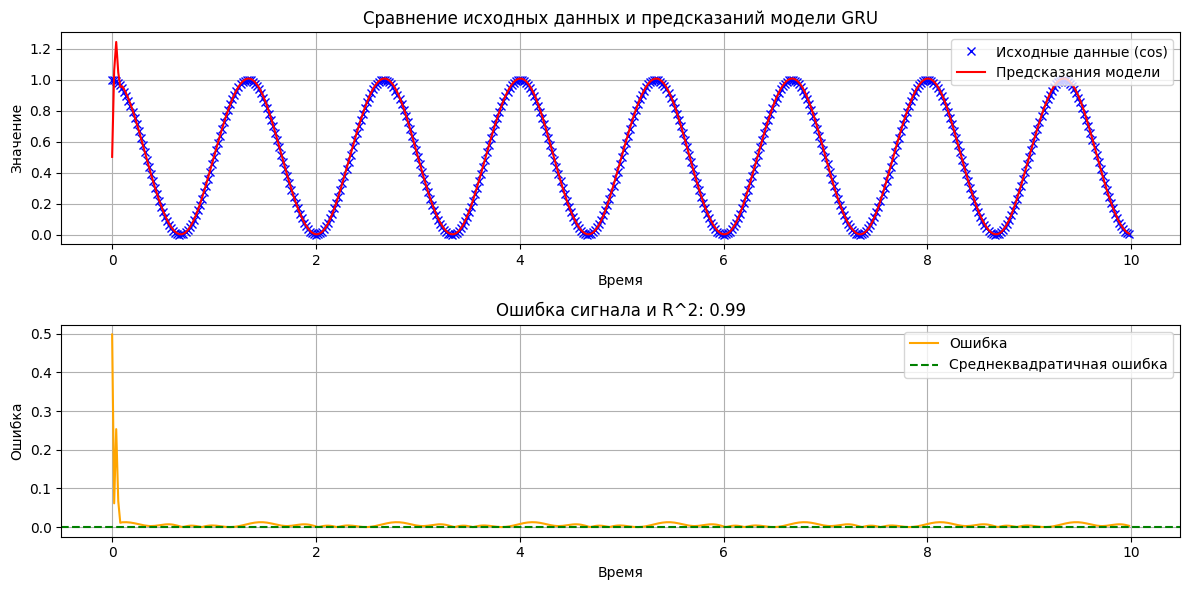

In [137]:
x = np.cos(1.5*np.pi*t)
x_inp, y = create_dataset(x, time_step)
x_inp = scaler.fit_transform(x_inp)
pred = model_gru.predict(x_inp.reshape(x_inp.shape[0], x_inp.shape[1], 1))
x = scaler.fit_transform(x.reshape(-1, 1))


error = mean_squared_error(x, pred)
r2 = r2_score(x, pred)

# Построение графика
plt.figure(figsize=(12, 6))

# График исходных данных и предсказаний
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Исходные данные (cos)', color='blue', marker='x', linestyle='')
plt.plot(t, pred, label='Предсказания модели', color='red')
plt.title('Сравнение исходных данных и предсказаний модели GRU')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.legend()
plt.grid()

# График ошибки и R^2
plt.subplot(2, 1, 2)
plt.plot(t, np.abs(x - pred), label='Ошибка', color='orange')
plt.axhline(y=error, color='green', linestyle='--', label='Среднеквадратичная ошибка')
plt.title(f'Ошибка сигнала и R^2: {r2:.2f}')
plt.xlabel('Время')
plt.ylabel('Ошибка')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
